In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
# Import the trees from sklearn
from sklearn import tree

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV


# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 


# Import our Random Forest 
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Library for visualizing our tree
from sklearn.model_selection import GridSearchCV

# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

# Use inline so our visualizations display in notebook
%matplotlib inline

In [ ]:
# df = df.iloc[0:100000]
# # df2 = df.iloc[1000000:1100000]
# # df3 = df.iloc[2000000:2100000]
# # df4 = df.iloc[3000000:3100000]
# # df5 = df.iloc[4000000:4100000]
# # df = [df1,df2,df3,df4]
# df

In [2]:
# df = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2019_4.csv')
# df

In [3]:
df = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2022_2.csv')
df

,ITIN_ID,YEAR,QUARTER,ORIGIN_STATE_NM,DEST_STATE_NM,TICKET_CARRIER,PASSENGERS,MARKET_FARE,NONSTOP_MILES
0,2022248,2022,2,South Carolina,Florida,3M,1.0,33.0,470.0
1,2022249,2022,2,South Carolina,Florida,3M,1.0,59.0,470.0
2,2022250,2022,2,South Carolina,Florida,3M,15.0,67.0,470.0
3,2022251,2022,2,South Carolina,Florida,3M,12.0,79.0,470.0
4,2022252,2022,2,South Carolina,Florida,3M,1.0,80.0,470.0
...,...,...,...,...,...,...,...,...,...
2097147,202221881608,2022,2,Massachusetts,Iowa,DL,1.0,236.5,1165.0
2097148,202221881608,2022,2,Iowa,Massachusetts,DL,1.0,236.5,1165.0
2097149,202221881609,2022,2,Massachusetts,Iowa,DL,1.0,285.0,1165.0
2097150,202221881609,2022,2,Iowa,Massachusetts,DL,1.0,285.0,1165.0


In [4]:
df.shape

(2097152, 9)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

11549

In [7]:
df = df.drop_duplicates()
df.shape

(2085603, 9)

In [8]:
Q1 = df['MARKET_FARE'].quantile(0.25)
Q1

# # # Calculate Q3
Q3 = df['MARKET_FARE'].quantile(0.75)
Q3
# # # Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1
IQR
# # # Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['MARKET_FARE'] < (Q1 - 1.5 * IQR)

# # # Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['MARKET_FARE'] > (Q3 + 1.5 * IQR)
outliers_above
# # # Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]

In [9]:
df.shape

(1983468, 9)

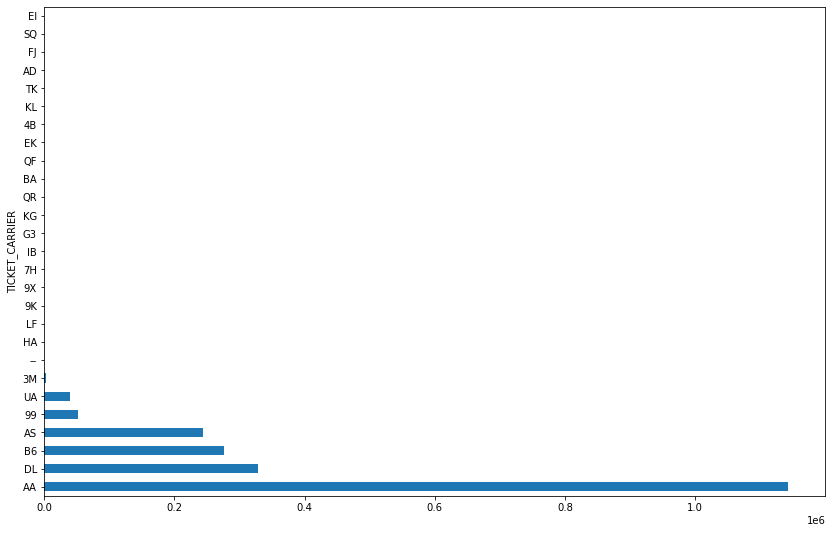

In [112]:
airline = df.groupby('TICKET_CARRIER')
airline_count= airline['TICKET_CARRIER'].count()
airline_count=airline_count.sort_values(ascending=False)
airline_count.plot(kind='barh',figsize=(14,9))

In [113]:
selected_features = ['NONSTOP_MILES']

In [114]:
X = df[selected_features].values

y = df['MARKET_FARE'].values


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (1877042, 1) 
Length of our Testing data: (208561,)


In [116]:
print(y_train.shape, type(y_train))

(1877042,) <class 'numpy.ndarray'>


In [117]:
model = tree.DecisionTreeRegressor()

model.fit(X_train,y_train)

DecisionTreeRegressor()

In [118]:
y_pred = model.predict(X_test)


In [119]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.138063


In [120]:
#2nd model Logistic Regression

In [121]:
# model_3 = LogisticRegression()

In [122]:
# from sklearn import utils
# from sklearn import preprocessing
# lab = preprocessing.LabelEncoder()
# y_transformed_2 = lab.fit_transform(y_train)

# print(y_transformed_2)

In [123]:
# model_3.fit(X_train, y_transformed_2)


In [124]:
# y_pred_3 = model_3.predict(X_test)

In [125]:
# 3rd model to see which gives best score possible

In [126]:
#Decision tree classifier
# model_2 = tree.DecisionTreeClassifier(max_depth=1)



In [127]:
# from sklearn import utils
# from sklearn import preprocessing
# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y_train)

# print(y_transformed)

In [128]:
# model_2.fit(X_train,y_transformed)


In [129]:
# y_pred2 = model_2.predict(X_test)
# #kernel dies will try at different time

In [130]:
# print(classification_report(y_test, y_pred, target_names=model.classes_))


In [131]:
model_4 = RandomForestRegressor(random_state=1)
model_4.fit(X_train, y_train)

y_pred = model_4.predict(X_test)

In [132]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.138349705914819


In [133]:
accuracy = model_4.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.138350


In [134]:
model_5 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1)
model_5.fit(X_train, y_train)

y_pred = model_5.predict(X_test)



In [135]:
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R-Squared Score: 0.12814381971617161
Mean Absolute Error: 146.17917346107185


In [136]:
accuracy = model_4.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.138350
